# ENGR-E 221 Intelligent Systems I Fall 2023
## Homework 9 Decision Tree Contiued (ensemble methods)
### Face completion with Different Regressors from lab with vertical splitting

Due: Wednesday 11/08/2023 23:59 EST

# Useful code from Lab to load the faces
```python
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import RandomForestRegressor

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)


train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people
print(test.shape)
print(train.shape)

# Create a small subset to sample
n_faces = 3
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test_small = test[face_ids, :]
print(test.shape)
n_pixels = data.shape[1]
print(test_small.shape)
```

# Problem 1: Vertical Split (10 points)


1) Provide a figure (plt.imshow()) the proves you are splitting the faces vertically. Hint you will have to reshape the data array if you use the same code from lab. 

```python
data, targets = fetch_olivetti_faces(return_X_y=True)
```

2) Properly set up using the code from 1) the training and testing arrays. 

(100, 4096)
(300, 4096)
(100, 4096)
(3, 4096)


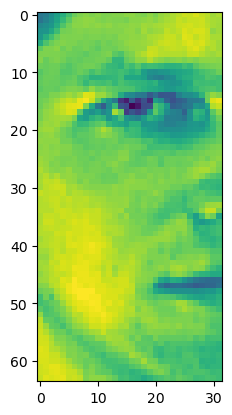

In [1]:
# student code for 1
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import RandomForestRegressor

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)


train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people
print(test.shape)
print(train.shape)

# Create a small subset to sample
n_faces = 3
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test_small = test[face_ids, :]
print(test.shape)
n_pixels = data.shape[1]
print(test_small.shape)

X_train = train.reshape(-1,64,64)
X_train = X_train[:,:,:32].reshape(-1,2048)
X_test = test.reshape(-1,64,64)
X_test = X_test[:,:,:32].reshape(-1,2048)
y_train = train.reshape(-1,64,64)
y_train = y_train[:,:,32:].reshape(-1,2048)
y_test = test.reshape(-1,64,64)
y_test = y_test[:,:,32:].reshape(-1,2048)

plt.imshow(X_train[1,:].reshape(64,32))

# Problem 2: Train a Random Forrest Regression Model (5 points)
On your vertically split faces train a random forrest regression model. 

In [2]:
# Student code for #2
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)

y_pred = model.predict(X_test)

# Problem 3: Reconstruct the Face (10 points)
Reconstruct the face, use plt.imshow() and np.hstack() (review lab) and show one figure of the actual face, and a second figure where half the face (left or right your choice) is the prediction and the other half is the actual face. 

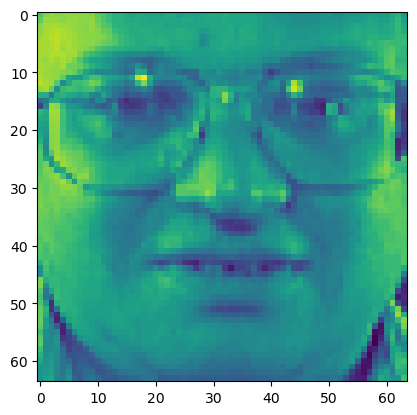

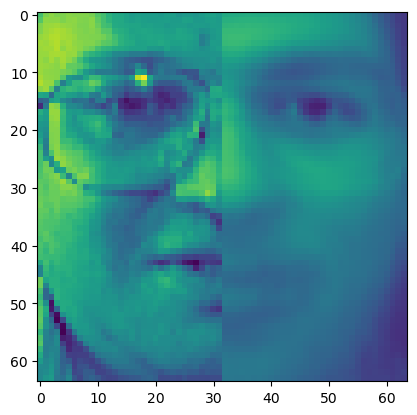

In [6]:
# Student code for #3
Image_shape = (64,64)
true_face = np.hstack((X_test[1].reshape(64,32),y_test[1].reshape(64,32)))
plt.imshow(true_face.reshape(Image_shape))
plt.show()
completed_face = np.hstack((X_test[1].reshape(64,32), y_pred[1].reshape(64,32)))
plt.imshow(completed_face.reshape(Image_shape))
plt.show()

# Problem 4: Evaluate your model (10 points) 
Use the evaluate() function from lab and discuss the results of your model. Use the values from the function and a hadful of sentences. You must compare your results to the results from the lab and discuss the differences between horizontal and vertical splitting.

```python
def evaluate(model, test_features, test_labels):
    test_labels = test_labels + 1
    test_features = test_features + 1
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
```

In [7]:
# Student code for #4 using the evaluate() function here. 
def evaluate(model, test_features, test_labels):
    test_labels = test_labels + 1
    test_features = test_features + 1
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
evaluate(model, y_test, y_pred)

Model Performance
Average Error: 0.8964 degrees.
Accuracy = 40.91%.


40.91376548275177

# Student discussion for #4 here.

Simply comparing the accuracy scores of each model our model seems ot be more accurate than the lab. The labs accuracy score is 38% while our accuracy score is nearly 41%. This is clear seen when compraing each of the reconstructed images. In the vertically split reconstructed image the models predictions are blurry but are accuratly aligned and all important fetures are clear and somewhat accurate depite the blurryness. On the other hand, the horizontal split reconstructed image the model's predictions are while general fits it is not 100% aligned, additionly it is very blurry and the features alginment seems off otherwise it is very similar to vrtical split. 

# Problem 5: Optimize your model (15)

As we did in lab explore the parameters max_depth, min_samples_leaf, min_samples_split and n_estimators. Try and improve your model as much as you can. Provide a handful of sentences that discuss these parameters and the optimal values you arrived at. 

```python
hyper_model_rf = RandomForestRegressor(max_depth=2, max_features=2, min_samples_leaf=3,
                                      min_samples_split=8,n_estimators=100, random_state=0, bootstrap=True)
```

In [8]:
# Student code for #5
hyper_model_rf = RandomForestRegressor(max_depth=4, max_features=3, min_samples_leaf=2,
                                      min_samples_split=32,n_estimators=90, random_state=0, bootstrap=False)
hyper_model_rf = hyper_model_rf.fit(X_train, y_train)
y_pred_hyper = hyper_model_rf.predict(X_test)
def evaluate(model, test_features, test_labels):
    test_labels = test_labels + 1
    test_features = test_features + 1
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
evaluate(hyper_model_rf, y_test, y_pred_hyper)

Model Performance
Average Error: 0.8833 degrees.
Accuracy = 41.79%.


41.78531645173119

# Student discussion for #5

When trying to figure out the optimal parameters for the model we started but adjusting just one parameters. Starting with max_depth, we increased the parameter until the evaluated scores start to decrease, Once we figred the highest accurate parameter we moved on to the next parameter max_features and repeated the process. Additionally once we found the optimal parameter for max_features we went back and made sure the max_depth is still optimal. We did the same for all the parameters of RandomForestRegressor. In cases where increaseing the initial parameter decreases the evaluated accuracy we would decrease the parameter until the accuracy decreases, and make sure all the other parameters are also optimal.

I could not increase the accuracy score by much any changes I made usual decreases or only very slightly increases the accuracy. Managed to increase acuracy from 40.914 to 41.785 which is the highest accuracy I could achieve.